In [307]:
# Crea el entorno virtual: python3 -m venv entornov
# Activa el entorno: source entornov/bin/activate
# Importa las librerias necesarias
# touch .gitignore
# touch main.py
# touch requirements.txt
# pip freeze > requirements.txt

# import sys
# !{sys.executable} -m pip install numpy pandas matplotlib sklearn seaborn

import yfinance as yf
symbol = "^GSPC"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime as dt

In [3]:
# Define el rango de fechas
start_date = '1947-01-01'
end_date = '2023-03-01'

## Series temporales

In [58]:
# pd.to_datetime([]) devuelve una secuencia de valores DatimeIndex de tipo dtetime64[ns]
# Son enteros de 64 bits en unidades de nanosegundos: Arreglo Numpy datetime64 para series de tiempo
df = pd.to_datetime([end_date,start_date])
df

DatetimeIndex(['2023-03-01', '1947-01-01'], dtype='datetime64[ns]', freq=None)

In [63]:
# Un ejemplo de como utilizar format
print(pd.to_datetime(['18/04/81']))
pd.to_datetime(['18/04/81'], format='%d/%m/%y')

DatetimeIndex(['1981-04-18'], dtype='datetime64[ns]', freq=None)


DatetimeIndex(['1981-04-18'], dtype='datetime64[ns]', freq=None)

In [66]:
# Creacion de dataframes con Series Temporales utilizando index_col y parse dates
# CPI mensual obtenido de FRED
CPI  = pd.read_csv('data/CPIAUCSL.csv', index_col=0,parse_dates=True)
CPI.head()

,CPIAUCSL
DATE,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


In [72]:
# La indexacion de fechas permite buscar por año, mes o dia
print(CPI.index.year)
print(CPI.index.month)
CPI.sample(8,random_state=0) # extraer una muestra aleatoria de 8 filas 
# random_state = 0 para garantizar que se obtenga la misma muestra aleatoria cada vez que se ejecute el código.

Int64Index([1947, 1947, 1947, 1947, 1947, 1947, 1947, 1947, 1947, 1947,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2023, 2023],
           dtype='int64', name='DATE', length=914)
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             5,  6,  7,  8,  9, 10, 11, 12,  1,  2],
           dtype='int64', name='DATE', length=914)


,CPIAUCSL
DATE,
1968-01-01,34.100
2004-12-01,191.700
1959-01-01,29.010
2009-05-01,213.022
1959-02-01,29.000
1978-01-01,62.700
1951-08-01,25.860
2022-11-01,298.598


In [74]:
# Indexacion basada en el tiempo
CPI.loc['1948'] 
# Tambien puedo buscar CPI.loc['1948-02'] y me devuelve ese unico registro

,CPIAUCSL
DATE,
1948-01-01,23.68
1948-02-01,23.67
1948-03-01,23.50
1948-04-01,23.82
1948-05-01,24.01
1948-06-01,24.15
1948-07-01,24.40
1948-08-01,24.43
1948-09-01,24.36


In [77]:
# Puedo buscar por intervalos
CPI.loc['1948-02-01':'1948-04-01']


,CPIAUCSL
DATE,
1948-02-01,23.67
1948-03-01,23.50
1948-04-01,23.82


In [83]:
# Puedo crear un rango de fechas especificando la frecuencia de muestreo con date_range
pd.date_range('1947','1949',freq='MS')  #'M' devuelve los fin de mes y 'MS' los 01 de cada mes

DatetimeIndex(['1947-01-01', '1947-02-01', '1947-03-01', '1947-04-01',
               '1947-05-01', '1947-06-01', '1947-07-01', '1947-08-01',
               '1947-09-01', '1947-10-01', '1947-11-01', '1947-12-01',
               '1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01', '1948-11-01', '1948-12-01',
               '1949-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [91]:
# Completar valores intermedios con asfreq y ffill
df = pd.date_range('1947','1949',freq='MS')     # Crea un df con frecuencia MS
df1 = CPI.loc[df,'CPIAUCSL']        # Devuelve la SERIE de tiempo del rango df de CPI
df1 = df1.asfreq('D')               # Agrega los dias faltantes en fechas y NAN en CPIAUCSL
df1 = df1.asfreq('D',method='ffill') 
df1


1947-01-01    21.48
1947-01-02      NaN
1947-01-03      NaN
1947-01-04      NaN
1947-01-05      NaN
              ...  
1948-12-28      NaN
1948-12-29      NaN
1948-12-30      NaN
1948-12-31      NaN
1949-01-01    24.01
Freq: D, Name: CPIAUCSL, Length: 732, dtype: float64

In [95]:
# Remuestreo semanal
CPI['CPIAUCSL'].resample('W').mean()



DATE
1947-01-05     21.480
1947-01-12        NaN
1947-01-19        NaN
1947-01-26        NaN
1947-02-02     21.620
               ...   
2023-01-08        NaN
2023-01-15        NaN
2023-01-22        NaN
2023-01-29        NaN
2023-02-05    301.648
Freq: W-SUN, Name: CPIAUCSL, Length: 3971, dtype: float64

<Axes: xlabel='DATE'>

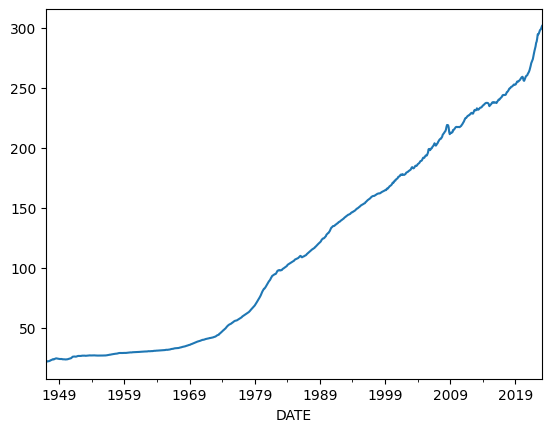

In [79]:
CPI['CPIAUCSL'].plot()

## CPI diario

In [167]:
CPI  = pd.read_csv('data/CPIAUCSL.csv')
CPI['DATE'] = pd.to_datetime(CPI['DATE'], format='%Y/%m/%d')  # Cambia el formato de object a datetime
CPI.set_index('DATE', inplace=True) # Establecer la columna DATE como índice
CPI = CPI.rename(columns={'CPIAUCSL':'CPI'})
CPI = CPI['CPI'].resample('D').ffill()     # Hacer el muestreo diario completando con ffill
CPI = CPI.to_frame()  # COnvierte la serie en Dataframe
CPI

,CPI
DATE,
1947-01-01,21.480
1947-01-02,21.480
1947-01-03,21.480
1947-01-04,21.480
1947-01-05,21.480
...,...
2023-01-28,300.536
2023-01-29,300.536
2023-01-30,300.536


In [168]:
CPI['Year'] = CPI.index.year        # Obtengo la columna Year
CPI

,CPI,Year
DATE,,
1947-01-01,21.480,1947
1947-01-02,21.480,1947
1947-01-03,21.480,1947
1947-01-04,21.480,1947
1947-01-05,21.480,1947
...,...,...
2023-01-28,300.536,2023
2023-01-29,300.536,2023
2023-01-30,300.536,2023


In [169]:
# Calculo la correlacion
corr = CPI['CPI'].corr(CPI['Year']) 
print(f"El coeficiente de correlación entre Year y CPI es: {corr}")

El coeficiente de correlación entre Year y CPI es: 0.9756898627131568


In [160]:
pd.to_datetime(CPI.index, format='%d/%m/%y')

DatetimeIndex(['1947-01-01', '1947-01-02', '1947-01-03', '1947-01-04',
               '1947-01-05', '1947-01-06', '1947-01-07', '1947-01-08',
               '1947-01-09', '1947-01-10',
               ...
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-28', '2023-01-29', '2023-01-30',
               '2023-01-31', '2023-02-01'],
              dtype='datetime64[ns]', name='DATE', length=27791, freq='D')

In [171]:
# Regresion lineal para proyectar el CPI
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
# Convertir los valores de x a su representación numérica en segundos desde la época Unix
x = CPI['Year']
y = CPI['CPI']
linear_model.fit(x.values.reshape(-1,1), y)

LinearRegression()

In [173]:
from sklearn.model_selection import train_test_split
X = x.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
linear_model.fit(X_train, y_train)
y_train_pred = linear_model.predict(X_train) # subset de entrenamiento
y_test_pred = linear_model.predict(X_test) #subset de testeo

In [174]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 

rmse_train = (mean_squared_error(y_train, y_train_pred, squared = False))
rmse_test = (mean_squared_error(y_test, y_test_pred, squared = False))

r2 = r2_score(y_test, y_test_pred) 
print('El coeficiente de determinación del regresor es:', r2)
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

El coeficiente de determinación del regresor es: 0.9511000898743859
Raíz del error cuadrático medio en Train: 18.123269908430025
Raíz del error cuadrático medio en Test: 18.216950577230442


In [175]:
a = linear_model.coef_
b = linear_model.intercept_
print('La pendiente obtenida con Sklearn es :', a)
print('La ordenada al origen obtenida con Sklearn es:', b)

La pendiente obtenida con Sklearn es : [3.67794176]
La ordenada al origen obtenida con Sklearn es: -7182.186989007231


<Figure size 1300x700 with 0 Axes>

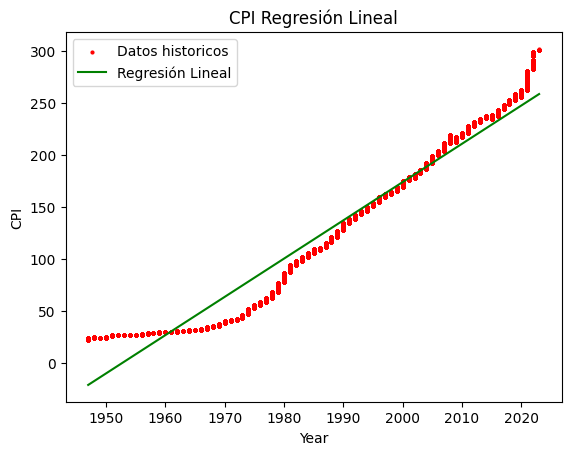

In [176]:
plt.figure(figsize = (13,7))
fig, ax = plt.subplots()
ax.scatter(x, y, s = 4, c = 'r',label ='Datos historicos')
plt.plot(X,linear_model.predict(X),label ='Regresión Lineal', c = 'g')
plt.title('CPI Regresión Lineal')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.legend()
plt.show()

In [177]:
X = np.arange(2022,2051,1)
Y = a * X + b
CPI_RL = pd.DataFrame({'Year': X, 'CPI': Y})
CPI_RL = pd.concat([CPI, CPI_RL], axis=0)
CPI_RL = CPI_RL.reset_index(drop=True)
X = CPI_RL['Year']
Y = CPI_RL['CPI']

<Figure size 1200x600 with 0 Axes>

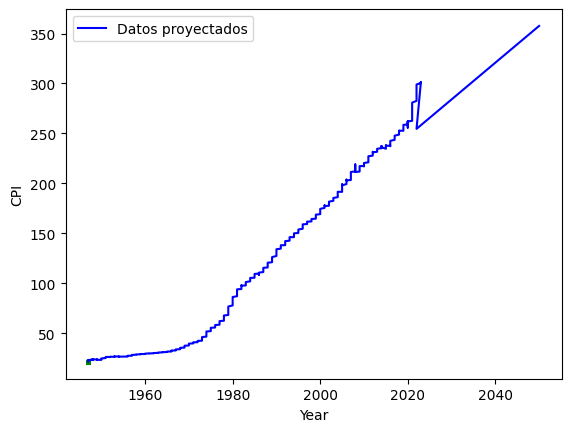

In [178]:
plt.figure(figsize = (12,6))
fig, ax = plt.subplots()
ax.scatter(X[:62], Y[:62], c = 'g', s = 6)
plt.plot(X[62:],Y[62:], '-', c = 'b',label ='Datos proyectados')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.legend()
plt.show()

In [181]:
CPI.to_csv('data/CPI_D.csv')

## CPI Diario Interpolado

In [185]:
# Veamos si puedo interpolar
CPI  = pd.read_csv('data/CPIAUCSL.csv')
CPI['DATE'] = pd.to_datetime(CPI['DATE'], format='%Y/%m/%d')  # Cambia el formato de object a datetime
CPI.set_index('DATE', inplace=True) # Establecer la columna DATE como índice
CPI = CPI.rename(columns={'CPIAUCSL':'CPI'})
CPI = CPI.resample('D').interpolate(method='linear')
# CPI = CPI['CPI'].resample('D').ffill()     # Hacer el muestreo diario completando con ffill
# CPI = CPI.to_frame()  # COnvierte la serie en Dataframe
CPI

,CPI
DATE,
1947-01-01,21.480000
1947-01-02,21.484516
1947-01-03,21.489032
1947-01-04,21.493548
1947-01-05,21.498065
...,...
2023-01-28,301.504516
2023-01-29,301.540387
2023-01-30,301.576258


In [187]:
# Calculo la correlacion
CPI['Year'] = CPI.index.year   
corr = CPI['CPI'].corr(CPI['Year']) 
print(f"El coeficiente de correlación entre Year y CPI es: {corr}")

El coeficiente de correlación entre Year y CPI es: 0.9757397082535768


In [188]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()                                           # Instancia el modelo
x = CPI['Year']     
y = CPI['CPI']
from sklearn.model_selection import train_test_split
X = x.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
linear_model.fit(X_train, y_train)
y_train_pred = linear_model.predict(X_train) # subset de entrenamiento
y_test_pred = linear_model.predict(X_test) #subset de testeo
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
rmse_train = (mean_squared_error(y_train, y_train_pred, squared = False))
rmse_test = (mean_squared_error(y_test, y_test_pred, squared = False))
r2 = r2_score(y_test, y_test_pred) 
print('El coeficiente de determinación del regresor es:', r2)
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

El coeficiente de determinación del regresor es: 0.9512105341177349
Raíz del error cuadrático medio en Train: 18.12296700512218
Raíz del error cuadrático medio en Test: 18.214206865630562


In [189]:
a = linear_model.coef_
b = linear_model.intercept_
print('La pendiente obtenida con Sklearn es :', a)
print('La ordenada al origen obtenida con Sklearn es:', b)

La pendiente obtenida con Sklearn es : [3.68164797]
La ordenada al origen obtenida con Sklearn es: -7189.395044254205


<Figure size 1300x700 with 0 Axes>

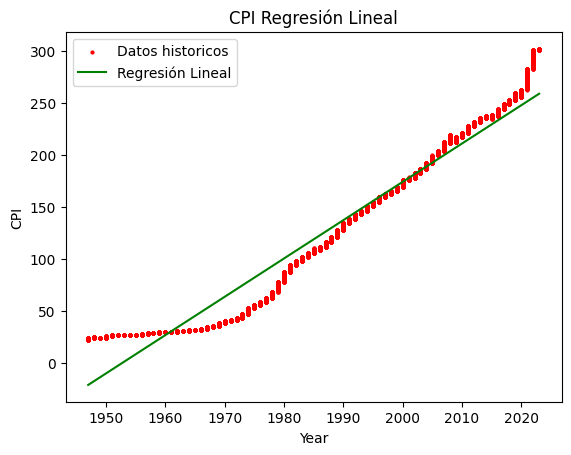

In [190]:
plt.figure(figsize = (13,7))
fig, ax = plt.subplots()
ax.scatter(x, y, s = 4, c = 'r',label ='Datos historicos')
plt.plot(X,linear_model.predict(X),label ='Regresión Lineal', c = 'g')
plt.title('CPI Regresión Lineal')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.legend()
plt.show()

In [191]:
X = np.arange(2022,2051,1)
Y = a * X + b
CPI_RL = pd.DataFrame({'Year': X, 'CPI': Y})
CPI_RL = pd.concat([CPI, CPI_RL], axis=0)
CPI_RL = CPI_RL.reset_index(drop=True)
X = CPI_RL['Year']
Y = CPI_RL['CPI']

<Figure size 1200x600 with 0 Axes>

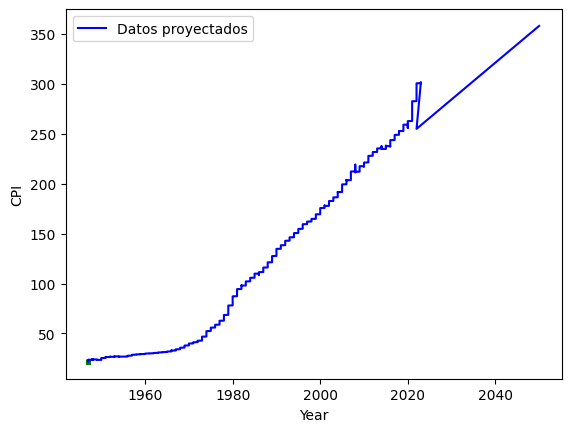

In [192]:
plt.figure(figsize = (12,6))
fig, ax = plt.subplots()
plt.scatter(X[:62], Y[:62], c = 'g', s = 6)
plt.plot(X[62:],Y[62:], '-', c = 'b',label ='Datos proyectados')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.legend()
plt.show()

In [193]:
CPI.to_csv('data/CPI_D.csv')

## CPI Anual

In [5]:
# CPI anual obtenido de FRED
CPI  = pd.read_csv('data/CPI_USA.csv',sep=';')
CPI.head()

,Year,CPI
0,1960,13.563061
1,1961,13.708284
2,1962,13.872615
3,1963,14.044590
4,1964,14.224207


In [6]:
# Calculo de correlacion lineal del CPI con la fecha
# Calcular la matriz de correlación
corr_matrix = np.corrcoef(CPI['Year'], CPI['CPI'])
# Obtener el coeficiente de correlación
corr = corr_matrix[0,1]
print(f"El coeficiente de correlación entre Year y CPI es: {corr}")
# Una regresion lineal es suficiente para representar el CPI

El coeficiente de correlación entre Year y CPI es: 0.9945532602617088


In [170]:
# Regresion lineal para proyectar el CPI
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
# Convertir los valores de x a su representación numérica en segundos desde la época Unix
x = CPI['Year']
y = CPI['CPI']
linear_model.fit(x.values.reshape(-1,1), y)

LinearRegression()

In [10]:
from sklearn.model_selection import train_test_split
X = x.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(46, 1) (46,) (16, 1) (16,)


In [12]:
# Entrenamos el modelo
linear_model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_train_pred = linear_model.predict(X_train) # subset de entrenamiento
y_test_pred = linear_model.predict(X_test) #subset de testeo

In [14]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 

rmse_train = (mean_squared_error(y_train, y_train_pred, squared = False))
rmse_test = (mean_squared_error(y_test, y_test_pred, squared = False))

r2 = r2_score(y_test, y_test_pred) 
print('El coeficiente de determinación del regresor es:', r2)
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

El coeficiente de determinación del regresor es: 0.9872644195005921
Raíz del error cuadrático medio en Train: 3.410708849578569
Raíz del error cuadrático medio en Test: 4.326264811941489


In [15]:
# Aquí observamos cómo el modelo ha aprendido de los datos, a partir de la pendiente y 
#la ordenada al origen que calculó
a = linear_model.coef_
b = linear_model.intercept_
print('La pendiente obtenida con Sklearn es :', a)
print('La ordenada al origen obtenida con Sklearn es:', b)

La pendiente obtenida con Sklearn es : [1.95637038]
La ordenada al origen obtenida con Sklearn es: -3833.3511316808303


<Figure size 1300x700 with 0 Axes>

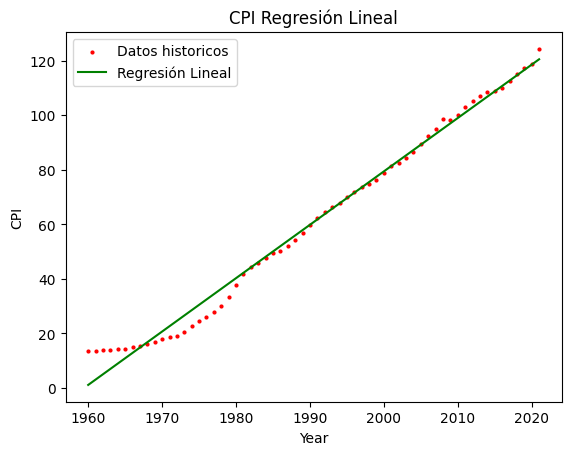

In [16]:
plt.figure(figsize = (13,7))
fig, ax = plt.subplots()
ax.scatter(x, y, s = 4, c = 'r',label ='Datos historicos')
plt.plot(X,linear_model.predict(X),label ='Regresión Lineal', c = 'g')
plt.title('CPI Regresión Lineal')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.legend()
plt.show()

In [23]:
X = np.arange(2022,2051,1)
Y = a * X + b
CPI_RL = pd.DataFrame({'Year': X, 'CPI': Y})
CPI_RL = pd.concat([CPI, CPI_RL], axis=0)
CPI_RL = CPI_RL.reset_index(drop=True)

In [24]:
X = CPI_RL['Year']
Y = CPI_RL['CPI']

<Figure size 1200x600 with 0 Axes>

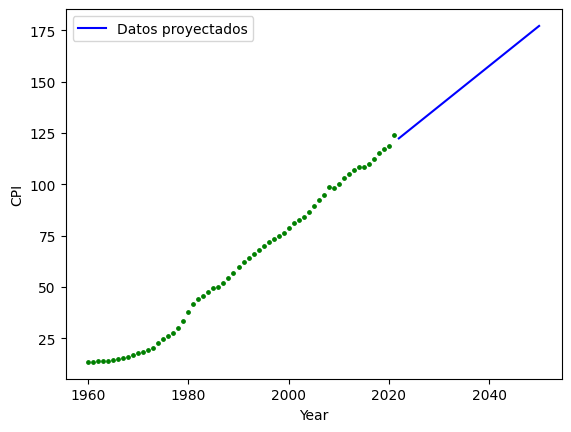

In [25]:
plt.figure(figsize = (12,6))
fig, ax = plt.subplots()
ax.scatter(X[:62], Y[:62], c = 'g', s = 6)
plt.plot(X[62:],Y[62:], '-', c = 'b',label ='Datos proyectados')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.legend()

plt.show()

In [27]:
CPI_RL.to_csv('data/CPI_RL.csv', index=False)

In [193]:
# Calculadora CPI

# Ingresar los valores de a y b
# Valor_inicial = 100
# start_date = 2000
# final_date = 2020
# Valor_final = 149

# Crear el array X de fechas
X = np.arange(1960, 2051, 1)

# Ingresar los valores de Valor_inicial, start_date y final_date
Valor_inicial = float(input("Ingrese Valor_inicial: "))
start_date = int(input("Ingrese start_date: "))
final_date = int(input("Ingrese final_date: "))

# Encontrar el índice correspondiente a start_date y final_date en el array X
index_inicial = np.where(X == start_date)[0][0]
index_final = np.where(X == final_date)[0][0]

# Asignar el correspondiente valor de Y a CPI_inicial y CPI_final
CPI_inicial = a * X[index_inicial] + b
CPI_final = a * X[index_final] + b
# CPI_inicial = CPI_RL['CPI'][start_date]
# CPI_final = CPI_RL['CPI'][final_date]

# Calcular Valor_final
Valor_inicial = np.array(Valor_inicial)
Valor_final = Valor_inicial * CPI_final / CPI_inicial

# Imprimir Valor_final
print("Valor_final: ", Valor_final)


Valor_final:  [149.28528593]


## SP500

In [227]:

# Utiliza la función download de yfinance para descargar los datos del S&P 500
SP500 = yf.download(symbol, start=start_date, end=end_date)
SP500 = SP500.reset_index()
SP500.head(1)

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,1947-01-02,15.2,15.2,15.2,15.2,15.2,0


In [228]:
# Convierte a formato fechas
SP500['Date'] = pd.to_datetime(SP500.Date,format='%Y-%m-%d')
# Pasa SP500 de diario a anual
SP500 = SP500.rename(columns={'Adj Close':'Index'})
SP500 = SP500[['Date','Index']]
SP500 = SP500.groupby('Date').mean()
SP500.tail(3)

,Index
Date,
2023-02-24,3970.040039
2023-02-27,3982.239990
2023-02-28,3970.149902


In [229]:
# Pasa SP500 de diario a anual
SP500 = SP500.rename(columns={'Adj Close':'Index'})
SP500 = SP500[['Index']]
SP500 = SP500.groupby('Date').mean()

In [230]:
SP500

,Index
Date,
1947-01-02,15.200000
1947-01-03,15.260000
1947-01-06,15.440000
1947-01-07,15.320000
1947-01-08,15.410000
...,...
2023-02-22,3991.050049
2023-02-23,4012.320068
2023-02-24,3970.040039


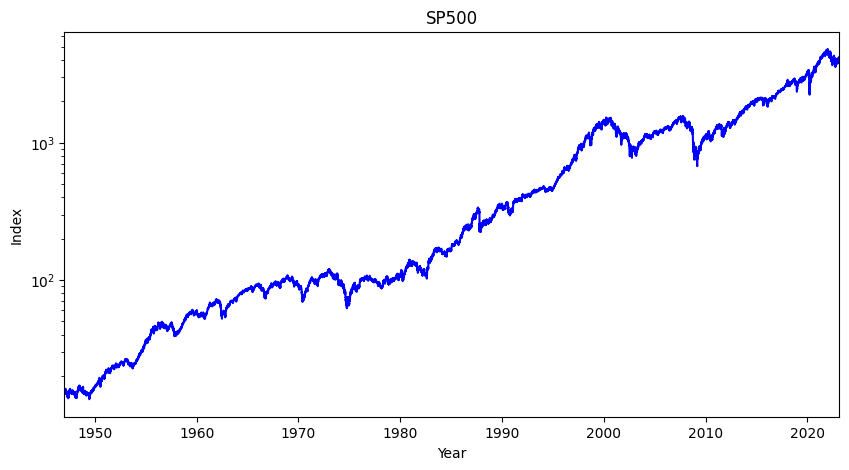

In [200]:
# Distingue rangos de fecha de bullmarket y bearmarket
plt.figure(figsize=(10, 5))
# Escala logartimica para y
plt.yscale('log')
# Graficar la serie de tiempo completa
# plt.plot(df['Fecha'], df['Valor'], color='blue')
plt.plot(SP500['Index'], label='SP500 Index', color='blue')

# # Graficar el rango de fechas en rojo
# plt.axvspan(2000, 2003, color='red', alpha=0.3)

# # Graficar el rango de fechas en verde
# plt.axvspan(2003, 2007, color='green', alpha=0.3)

# # Graficar el rango de fechas en rojo
# plt.axvspan(2007, 2009, color='red', alpha=0.3)

# # Graficar el rango de fechas en verde
# plt.axvspan(2009, 2021, color='green', alpha=0.3)

# # Graficar el rango de fechas en rojo
# plt.axvspan(2021, 2023, color='red', alpha=0.3)

# Ajustar los límites del eje x para incluir todas las fechas
# plt.xlim(df['Fecha'].min(), df['Fecha'].max())
plt.xlim(SP500.index.min(), SP500.index.max())

# Etiquetas y título
plt.xlabel('Year')
plt.ylabel('Index')
plt.title('SP500')

# Mostrar la gráfica
plt.show()

In [231]:
SP500.head()

,Index
Date,
1947-01-02,15.20
1947-01-03,15.26
1947-01-06,15.44
1947-01-07,15.32
1947-01-08,15.41


In [232]:
SP500.to_csv('data/SP500.csv')
SP500 = pd.read_csv('data/SP500.csv',index_col=0)
SP500

,Index
Date,
1947-01-02,15.200000
1947-01-03,15.260000
1947-01-06,15.440000
1947-01-07,15.320000
1947-01-08,15.410000
...,...
2023-02-22,3991.050049
2023-02-23,4012.320068
2023-02-24,3970.040039


In [194]:
# Calculadora SP500
# Crear el array X de fechas
# X = np.arange(1960, 2051, 1)
X = SP500.index
Y = SP500['Index']

# Ingresar los valores de Valor_inicial, start_date y final_date
Valor_inicial = float(input("Ingrese Valor_inicial: "))
start_date = int(input("Ingrese start_date: "))
final_date = int(input("Ingrese final_date: "))

# Encontrar el indice correspondiente
SP500_inicial = SP500['Index'][start_date]
SP500_final = SP500['Index'][final_date]

# Calcular Valor_final
Valor_inicial = np.array(Valor_inicial)
Valor_final = Valor_inicial * SP500_final / SP500_inicial

# Imprimir Valor_final
print("Valor_final: ", Valor_final)

Valor_final:  225.46302876137887


## SP500/CPI Diario

In [235]:
SP500 = pd.read_csv('data/SP500.csv',index_col=0)
CPI = pd.read_csv('data/CPI_D.csv',index_col=0)


,CPI,Year
DATE,,
1947-01-01,21.480000,1947
1947-01-02,21.484516,1947
1947-01-03,21.489032,1947
1947-01-04,21.493548,1947
1947-01-05,21.498065,1947
...,...,...
2023-01-28,301.504516,2023
2023-01-29,301.540387,2023
2023-01-30,301.576258,2023


In [240]:
SP500['Index']

Date
1947-01-02      15.200000
1947-01-03      15.260000
1947-01-06      15.440000
1947-01-07      15.320000
1947-01-08      15.410000
                 ...     
2023-02-22    3991.050049
2023-02-23    4012.320068
2023-02-24    3970.040039
2023-02-27    3982.239990
2023-02-28    3970.149902
Name: Index, Length: 19159, dtype: float64

In [ ]:
plt.figure(figsize = (15,10))
fig, ax = plt.subplots()
# ax.scatter(X[:62], Y[:62], c = 'g', label='CPI')
plt.plot(x,y, '-', c = 'r',label ='SP500/CPI')
plt.plot(SP500['Index'], label='SP500')

# plt.plot(X[62:],Y[62:], '-', c = 'b',label ='Datos proyectados')

plt.xlabel('Year')
plt.ylabel('Index')
plt.legend()

plt.show()

## SP500 / CPI

In [133]:
SP500_CPI = pd.read_csv('data/fredgraph.csv')
SP500_CPI.head()

,DATE,SP500_CPIAUCSL
0,2013-04-01,1570.390568
1,2013-05-01,1638.838567
2,2013-06-01,1613.939408
3,2013-07-01,1660.443131
4,2013-08-01,1657.896436


In [134]:
SP500_CPI['DATE'] =  pd.to_datetime(SP500_CPI.DATE,format='%Y-%m-%d')
SP500_CPI['Year'] = SP500_CPI['DATE'].dt.year
SP500_CPI = SP500_CPI.rename(columns={'SP500_CPIAUCSL':'Index'})
SP500_CPI.head(1)

,DATE,Index,Year
0,2013-04-01,1570.390568,2013


In [135]:
# Pasa SP500_CPI de diario a anual
SP500_CPI = SP500_CPI[['Year','Index']]
SP500_CPI = SP500_CPI.groupby('Year').mean()

In [136]:
SP500_CPI

,Index
Year,
2013,1674.688614
2014,1890.050019
2015,2015.589094
2016,2019.904122
2017,2314.195534
2018,2533.226388
2019,2639.494630
2020,2880.091893
2021,3645.844058


In [137]:

x = SP500_CPI.index
y = SP500_CPI['Index']

<Figure size 1500x1000 with 0 Axes>

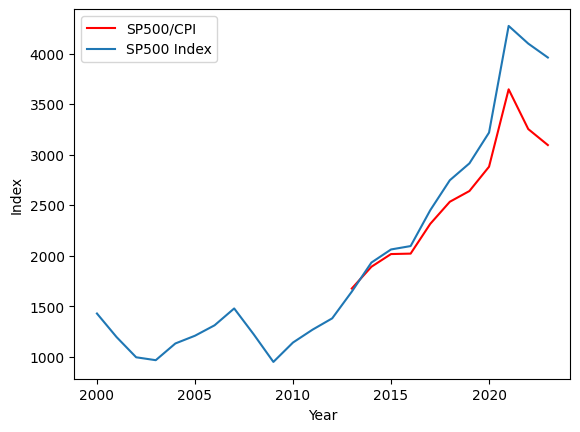

In [130]:
plt.figure(figsize = (15,10))
fig, ax = plt.subplots()
# ax.scatter(X[:62], Y[:62], c = 'g', label='CPI')
plt.plot(x,y, '-', c = 'r',label ='SP500/CPI')
plt.plot(SP500['Index'], label='SP500 Index')

# plt.plot(X[62:],Y[62:], '-', c = 'b',label ='Datos proyectados')

plt.xlabel('Year')
plt.ylabel('Index')
plt.legend()

plt.show()

<Figure size 1200x600 with 0 Axes>

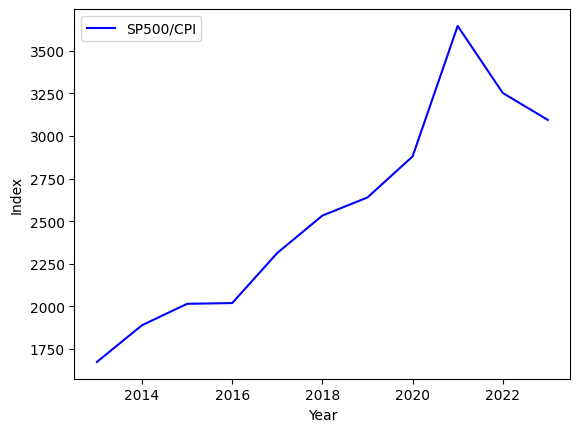

In [131]:
plt.figure(figsize = (12,6))
fig, ax = plt.subplots()
# ax.scatter(x, y, c = 'g', s = 6)
plt.plot(x,y, '-', c = 'b',label ='SP500/CPI')
# ax.scatter(X[:62], Y[:62], c = 'g', s = 6)
# plt.plot(X[62:],Y[62:], '-', c = 'b',label ='Datos proyectados')
plt.xlabel('Year')
plt.ylabel('Index')
plt.legend()

plt.show()


In [138]:
SP500_CPI.to_csv('data/SP500_CPI.csv')
SP500_CPI =  pd.read_csv('data/SP500_CPI.csv')
SP500_CPI.head()

,Year,Index
0,2013,1674.688614
1,2014,1890.050019
2,2015,2015.589094
3,2016,2019.904122
4,2017,2314.195534


In [139]:
SP500.head()

,Index
Year,
2000,1427.221069
2001,1194.178994
2002,993.934804
2003,965.227540
2004,1130.649445


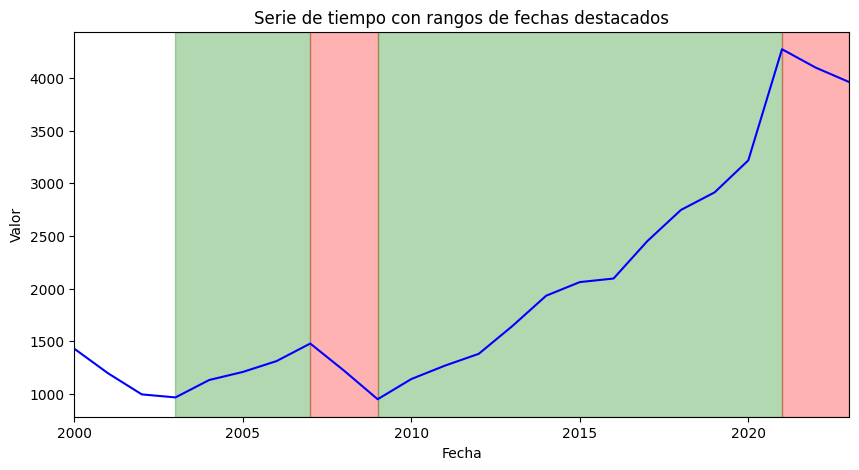

In [121]:
# Distingue rangos de fecha de bullmarket y bearmarket
plt.figure(figsize=(10, 5))

# Graficar la serie de tiempo completa
# plt.plot(df['Fecha'], df['Valor'], color='blue')
plt.plot(SP500['Index'], label='SP500 Index', color='blue')

# Graficar el rango de fechas en verde
plt.axvspan(2003, 2007, color='green', alpha=0.3)

# Graficar el rango de fechas en rojo
plt.axvspan(2007, 2009, color='red', alpha=0.3)

# Graficar el rango de fechas en verde
plt.axvspan(2009, 2021, color='green', alpha=0.3)

# Graficar el rango de fechas en rojo
plt.axvspan(2021, 2023, color='red', alpha=0.3)

# Ajustar los límites del eje x para incluir todas las fechas
# plt.xlim(df['Fecha'].min(), df['Fecha'].max())
plt.xlim(SP500.index.min(), SP500.index.max())

# Etiquetas y título
plt.xlabel('Year')
plt.ylabel('Index')
plt.title('SP500')

# Mostrar la gráfica
plt.show()


## 1960

In [154]:
df = pd.read_csv('data/1960.csv',sep=';')
df.tail(2)

,Year,SP500,CPI,CPI 1960,SP500/CPI,SP500 1960,SP500/CPI 1960
0,1960,"55,8457539876302","13,5630607803977",1,"55,8457539876302",1,1
1,1961,"66,2663200531006","13,7082837473334","1,01070724147647","65,5643071838457","1,18659549422107","1,1740249258407"
2,1962,"62,3207539755201","13,8726149993924","1,02282333051564","60,9301255810249","1,11594435611567","1,09104311841722"
3,1963,"69,8593624920484","14,0445895655005","1,03550295857988","67,464184349464","1,25093418037694","1,2080450084783"
4,1964,"81,3728854816422","14,2242074456579","1,0487461256692","77,5906422822001","1,45710066873958","1,38937406592068"
...,...,...,...,...,...,...,...
57,2017,"2449,0763790541","112,411557302308","8,28806706114398","295,494276408046","43,8542987457304","5,29125771089952"
58,2018,"2746,21418330584","115,157303224791","8,49051000281769","323,445138442152","49,1749862292866","5,79175882402438"
59,2019,"2913,3563804021","117,244195476228","8,64437588052968","337,023334092176","52,1679120143567","6,03489629966902"
60,2020,"3217,85584895319","118,690501577198","8,75101155254999","367,712444399131","57,6204208768664","6,58442975773197"


In [157]:
df1 = df[['Year','CPI 1960','SP500 1960','SP500/CPI 1960']]
df1 = df1.rename(columns={'CPI 1960':'CPI','SP500 1960':'SP500','SP500/CPI 1960':'SP500/CPI'})
df1.head(1)

,Year,CPI,SP500,SP500/CPI
0,1960,1,1,1


In [166]:
# Convierte de string a float
df1['CPI'] = df1['CPI'].str.replace(',', '.')
df1['SP500'] = df1['SP500'].str.replace(',', '.')
df1['SP500/CPI'] = df1['SP500/CPI'].str.replace(',', '.')
df1['CPI'] = pd.to_numeric(df1['CPI'])
df1['SP500'] = pd.to_numeric(df1['SP500'])
df1['SP500/CPI'] = pd.to_numeric(df1['SP500/CPI'])


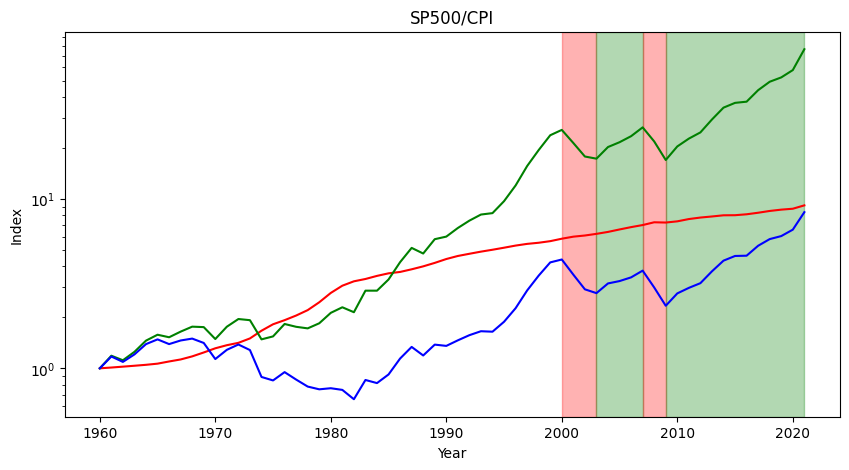

In [247]:
# Distingue rangos de fecha de bullmarket y bearmarket
plt.figure(figsize=(10, 5))

# Escala logartimica para y
plt.yscale('log')
# Graficar la serie de tiempo completa
plt.plot(df1['Year'],df1['CPI'], label='CPI', color='red')
plt.plot(df1['Year'],df1['SP500'], label='SP500 Index', color='green')
plt.plot(df1['Year'],df1['SP500/CPI'], label='SP500/CPI', color='blue')

# Graficar el rango de fechas en rojo
plt.axvspan(2000, 2003, color='red', alpha=0.3)

# Graficar el rango de fechas en verde
plt.axvspan(2003, 2007, color='green', alpha=0.3)

# Graficar el rango de fechas en rojo
plt.axvspan(2007, 2009, color='red', alpha=0.3)

# Graficar el rango de fechas en verde
plt.axvspan(2009, 2021, color='green', alpha=0.3)

# Graficar el rango de fechas en rojo
# plt.axvspan(2021, 2023, color='red', alpha=0.3)

# Ajustar los límites del eje x para incluir todas las fechas
# plt.xlim(df['Fecha'].min(), df['Fecha'].max())
# plt.xlim(SP500.index.min(), SP500.index.max())

# Etiquetas y título
plt.xlabel('Year')
plt.ylabel('Index')
plt.title('SP500/CPI')

# Mostrar la gráfica
plt.show()

In [200]:
df1.to_csv('data/SP500Real.csv',index=False)

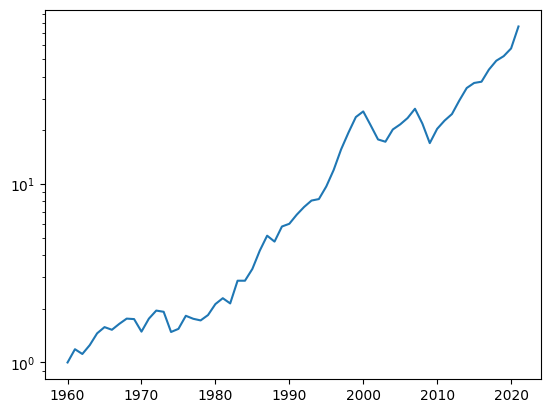

In [174]:
x = df1['Year']
y = df1['SP500']
plt.semilogy(x, y)

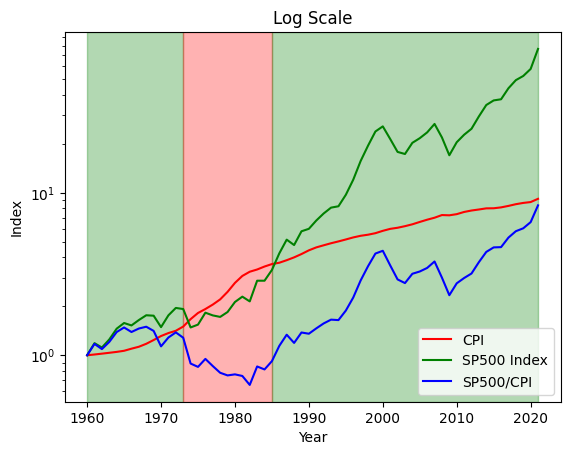

In [179]:
# Crear una figura y un eje
fig, ax = plt.subplots()
# Graficar la serie de tiempo completa
ax.plot(df1['Year'],df1['CPI'], label='CPI', color='red')
ax.plot(df1['Year'],df1['SP500'], label='SP500 Index', color='green')
ax.plot(df1['Year'],df1['SP500/CPI'], label='SP500/CPI', color='blue')


# Graficar el rango de fechas en verde
plt.axvspan(1960, 1973, color='green', alpha=0.3)

# Graficar el rango de fechas en rojo
plt.axvspan(1973, 1985, color='red', alpha=0.3)

# Graficar el rango de fechas en verde
plt.axvspan(1985, 2021, color='green', alpha=0.3)
# Configurar la escala logarítmica en el eje Y
ax.set_yscale('log')

# Agregar una leyenda
ax.legend()

# Agregar etiquetas de los ejes y un título
ax.set_xlabel('Year')
ax.set_ylabel('Index')
ax.set_title('Log Scale')
plt.show()

## Apple

In [269]:
AAPL = yf.download('AAPL', start=start_date, end=end_date)
AAPL = AAPL.reset_index()
AAPL.head(3)


[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099722,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094519,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087582,105728000


In [234]:
# Obtiene los Close anuales

# # Seleccionar solo la columna Close
# AAPL_close = AAPL['Close']

# # Agrupar por año y obtener el valor de cierre del último día de cada año
# AAPL_close_yearly = AAPL_close.resample('A').last()

# # Agregar la columna Year
# AAPL_close_yearly['Year'] = pd.DatetimeIndex(AAPL_close_yearly.index).year

# Mostrar el resultado
# type(AAPL_close_yearly)

pandas.core.series.Series

In [270]:
# Convierte a formato fechas
AAPL['Date'] = pd.to_datetime(AAPL.Date,format='%Y-%m-%d')
AAPL['Year'] = AAPL['Date'].dt.year
AAPL = AAPL.rename(columns={'Adj Close':'Price'})
AAPL = AAPL[['Year','Price']]
AAPL.head(3)

,Year,Price
0,1980,0.099722
1,1980,0.094519
2,1980,0.087582


In [271]:
# Pasa de diario a anual
AAPL = AAPL.groupby('Year').mean()
AAPL.tail(3)

,Price
Year,
2021,139.587718
2022,154.146562
2023,135.572004


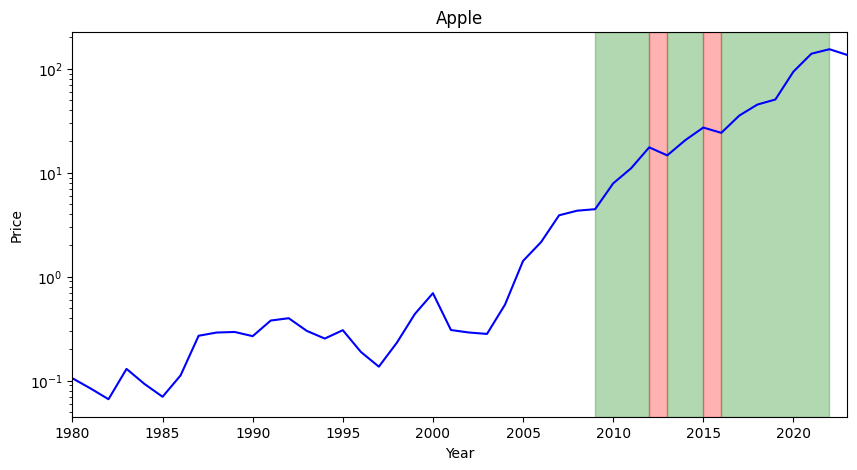

In [272]:
# Distingue rangos de fecha de bullmarket y bearmarket
plt.figure(figsize=(10, 5))

# Escala logartimica para y
plt.yscale('log')

# Graficar la serie de tiempo completa
# plt.plot(df['Fecha'], df['Valor'], color='blue')
plt.plot(AAPL['Price'], label='Apple', color='blue')

# Graficar el rango de fechas en verde
plt.axvspan(2009, 2012, color='green', alpha=0.3)

# Graficar el rango de fechas en rojo
plt.axvspan(2012, 2013, color='red', alpha=0.3)

# Graficar el rango de fechas en verde
plt.axvspan(2013, 2015, color='green', alpha=0.3)

# Graficar el rango de fechas en rojo
plt.axvspan(2015, 2016, color='red', alpha=0.3)

# Graficar el rango de fechas en verde
plt.axvspan(2016, 2022, color='green', alpha=0.3)


# Ajustar los límites del eje x para incluir todas las fechas
# plt.xlim(df['Fecha'].min(), df['Fecha'].max())
plt.xlim(AAPL.index.min(), AAPL.index.max())

# Etiquetas y título
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Apple')
plt.legend()
# Mostrar la gráfica
plt.show()

In [274]:
AAPL.to_csv('data/AAPL.csv')

## SP500 + Apple + CPI

In [275]:
AAPL = pd.read_csv('data/AAPL.csv')
SP500 = pd.read_csv('data/SP500.csv')

In [277]:
AAPL.head(2)
# La cotizacion de AAPL empieza por 1980, dividimos por el valor de 1980 para obtener el indice 

,Year,Price
0,1980,0.105592
1,1981,0.084338


In [284]:
AAPL['IdxAAPL'] = AAPL['Price']/AAPL['Price'][0]
AAPL.head(3)

,Year,Price,IdxAAPL
0,1980,0.105592,1.000000
1,1981,0.084338,0.798715
2,1982,0.066398,0.628822


In [286]:
SP500['SP80'] = SP500['Index']/SP500['Index'][20]
SP500.head(3)

,Year,Index,SP80
0,1960,55.845754,0.470438
1,1961,66.266320,0.558220
2,1962,62.320754,0.524983


In [293]:
# Incluye el CPI para hacer el ajuste por inflacion
CPI['CPI80'] = CPI['CPI']/CPI['CPI'][20]
CPI['CPI80'][20]

1.0

In [295]:
# Arma el portfolio con SP500 y APPLE
PF = pd.merge(SP500,AAPL, how='left',on='Year')
PF.head()
# A

,Year,Index,SP80,Price,IdxAAPL
0,1960,55.845754,0.470438,NaN,NaN
1,1961,66.266320,0.558220,NaN,NaN
2,1962,62.320754,0.524983,NaN,NaN
3,1963,69.859362,0.588487,NaN,NaN
4,1964,81.372885,0.685476,NaN,NaN


In [296]:
# Agrega CPI para hacer el ajuste
PF = pd.merge(PF,CPI, how='left',on='Year')
PF.head()

,Year,Index,SP80,Price,IdxAAPL,CPI,CPI80
0,1960,55.845754,0.470438,NaN,NaN,13.563061,0.358884
1,1961,66.266320,0.558220,NaN,NaN,13.708284,0.362726
2,1962,62.320754,0.524983,NaN,NaN,13.872615,0.367075
3,1963,69.859362,0.588487,NaN,NaN,14.044590,0.371625
4,1964,81.372885,0.685476,NaN,NaN,14.224207,0.376378


In [297]:
# Define la proporcion de iversion con coef
coef = 0.5
PF['Portfolio'] = (coef * PF['SP80'] + (1-coef) * PF['IdxAAPL'])/PF['CPI80']
PF.tail(3)

,Year,Index,SP80,Price,IdxAAPL,CPI,CPI80,Portfolio
61,2021,4273.385635,35.998495,139.587718,1321.959017,124.266414,3.288135,206.493558
62,2022,4098.514748,34.525404,154.146562,1459.837869,NaN,NaN,NaN
63,2023,3960.656531,33.364102,135.572004,1283.928378,NaN,NaN,NaN


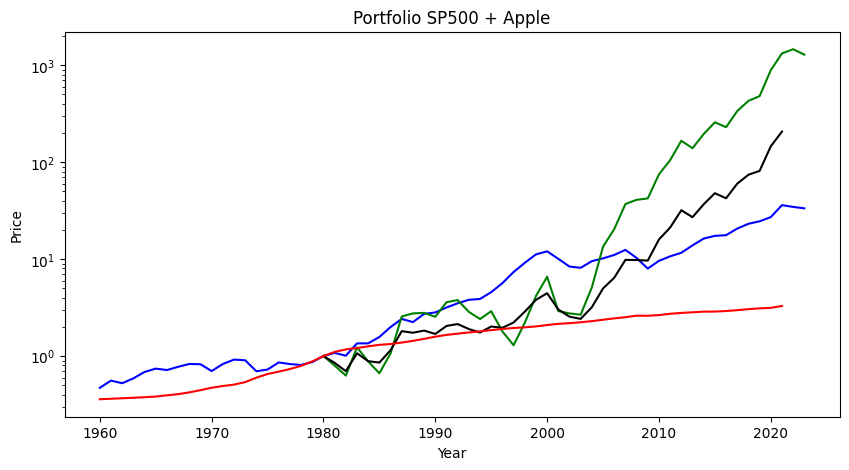

In [299]:
# Visualiza SP500 + AAPL en una proporcion de 0.5
plt.figure(figsize=(10, 5))

# Escala logartimica para y
plt.yscale('log')
# Graficar la serie de tiempo completa
plt.plot(PF['Year'],PF['SP80'], label='SP500', color='blue')
plt.plot(PF['Year'],PF['IdxAAPL'], label='Apple', color='green')
plt.plot(PF['Year'],PF['Portfolio'], label='Portfolio', color='black')
plt.plot(PF['Year'],PF['CPI80'], label='CPI', color='red')

# Etiquetas y título
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Portfolio SP500 + Apple')
plt.legend()
# Mostrar la gráfica
plt.show()

In [300]:
PF.to_csv('data/PF1.csv')

## SP500 + Meta + CPI

In [301]:
META = yf.download('META', start=start_date, end=end_date)
META = META.reset_index()
META.head(3)

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.00,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.66,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.59,30.940001,31.000000,31.000000,101786600


In [302]:
# Convierte a formato fechas
META['Date'] = pd.to_datetime(META.Date,format='%Y-%m-%d')
META['Year'] = META['Date'].dt.year
META = META.rename(columns={'Adj Close':'Price'})
META = META[['Year','Price']]
META.head(3)

,Year,Price
0,2012,38.230000
1,2012,34.029999
2,2012,31.000000


In [306]:
# Pasa de diario a anual
META = META.groupby('Year').mean()
META.tail(3)

,Price
Year,
2021,321.166230
2022,180.187690
2023,137.249501


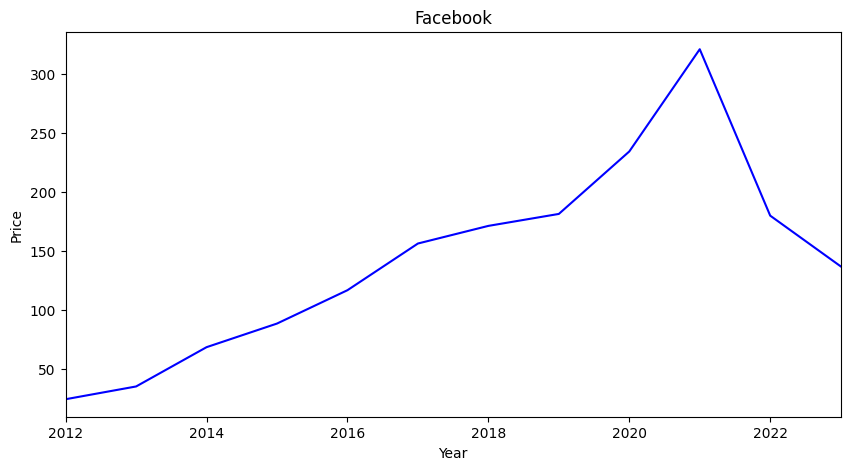

In [309]:
# Distingue rangos de fecha de bullmarket y bearmarket
plt.figure(figsize=(10, 5))

# Escala logartimica para y
# plt.yscale('log')

# Graficar la serie de tiempo completa
# plt.plot(df['Fecha'], df['Valor'], color='blue')
plt.plot(META['Price'], label='Facebook', color='blue')




# Ajustar los límites del eje x para incluir todas las fechas
# plt.xlim(df['Fecha'].min(), df['Fecha'].max())
plt.xlim(META.index.min(), META.index.max())

# Etiquetas y título
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Facebook')

# Mostrar la gráfica
plt.show()

In [310]:
META.to_csv('data/meta.csv')

In [311]:
META = pd.read_csv('data/meta.csv')
SP500 = pd.read_csv('data/SP500.csv')
META.head(2)

,Year,Price
0,2012,24.673097
1,2013,35.481151


In [312]:
META['IdxMETA'] = META['Price']/META['Price'][0]
SP500['SP12'] = SP500['Index']/SP500['Index'][52]
SP500.head(3)

,Year,Index,SP12
0,1960,55.845754,0.040487
1,1961,66.266320,0.048042
2,1962,62.320754,0.045181


In [313]:
# Arma el portfolio con SP500 y APPLE
PF2 = pd.merge(SP500,META, how='left',on='Year')
PF2.head()

,Year,Index,SP12,Price,IdxMETA
0,1960,55.845754,0.040487,NaN,NaN
1,1961,66.266320,0.048042,NaN,NaN
2,1962,62.320754,0.045181,NaN,NaN
3,1963,69.859362,0.050646,NaN,NaN
4,1964,81.372885,0.058993,NaN,NaN


In [317]:
# Incluye el CPI para hacer el ajuste por inflacion
CPI['CPI12'] = CPI['CPI']/CPI['CPI'][52]
# Agrega CPI para hacer el ajuste
PF2 = pd.merge(PF2,CPI, how='left',on='Year')
PF2.head()

,Year,Index,SP12,Price,IdxMETA,CPI_x,CPI80_x,CPI_y,CPI80_y,CPI12
0,1960,55.845754,0.040487,NaN,NaN,13.563061,0.128814,13.563061,0.128814,0.128814
1,1961,66.266320,0.048042,NaN,NaN,13.708284,0.130194,13.708284,0.130194,0.130194
2,1962,62.320754,0.045181,NaN,NaN,13.872615,0.131754,13.872615,0.131754,0.131754
3,1963,69.859362,0.050646,NaN,NaN,14.044590,0.133388,14.044590,0.133388,0.133388
4,1964,81.372885,0.058993,NaN,NaN,14.224207,0.135094,14.224207,0.135094,0.135094


In [318]:
# Define la proporcion de iversion con coef
coef = 0.5
PF2['Portfolio'] = (coef * PF2['SP12'] + (1-coef) * PF2['IdxMETA'])/PF2['CPI12']
PF2.tail(3)

,Year,Index,SP12,Price,IdxMETA,CPI_x,CPI80_x,CPI_y,CPI80_y,CPI12,Portfolio
61,2021,4273.385635,3.098106,321.166230,13.016859,124.266414,1.180213,124.266414,1.180213,1.180213,6.827142
62,2022,4098.514748,2.971329,180.187690,7.303003,NaN,NaN,NaN,NaN,NaN,NaN
63,2023,3960.656531,2.871385,137.249501,5.562719,NaN,NaN,NaN,NaN,NaN,NaN


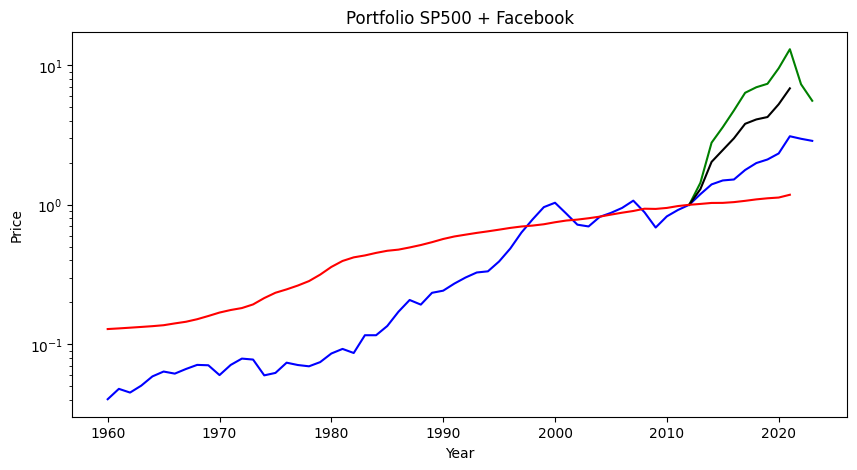

In [319]:
# Visualiza SP500 + AAPL en una proporcion de 0.5
plt.figure(figsize=(10, 5))

# Escala logartimica para y
plt.yscale('log')
# Graficar la serie de tiempo completa
plt.plot(PF2['Year'],PF2['SP12'], label='SP500', color='blue')
plt.plot(PF2['Year'],PF2['IdxMETA'], label='Facebook', color='green')
plt.plot(PF2['Year'],PF2['Portfolio'], label='Portfolio', color='black')
plt.plot(PF2['Year'],PF2['CPI12'], label='CPI', color='red')

# Etiquetas y título
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Portfolio SP500 + Facebook')

# Mostrar la gráfica
plt.show()

In [326]:
PF2.to_csv('data/PF2.csv')

## SP500 + GoPRO + CPI

In [320]:
GPRO = yf.download('GPRO', start=start_date, end=end_date)
GPRO = GPRO.reset_index()
GPRO['Date'] = pd.to_datetime(GPRO.Date,format='%Y-%m-%d')
GPRO['Year'] = GPRO['Date'].dt.year
GPRO = GPRO.rename(columns={'Adj Close':'Price'})
GPRO = GPRO[['Year','Price']]
GPRO = GPRO.groupby('Year').mean()
GPRO.tail(3)

[*********************100%***********************]  1 of 1 completed


,Price
Year,
2021,10.193433
2022,6.829602
2023,5.604500


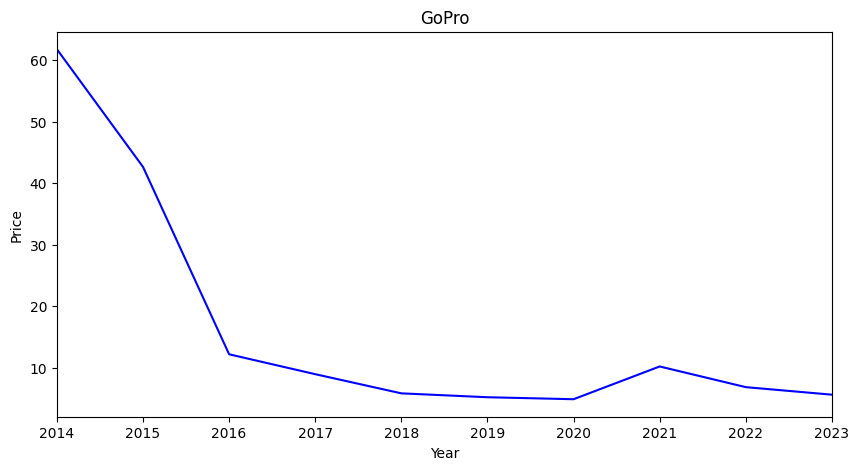

In [323]:
# Distingue rangos de fecha de bullmarket y bearmarket
plt.figure(figsize=(10, 5))

# Escala logartimica para y
# plt.yscale('log')

plt.plot(GPRO['Price'], label='Facebook', color='blue')

plt.xlim(GPRO.index.min(), GPRO.index.max())

# Etiquetas y título
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('GoPro')

# Mostrar la gráfica
plt.show()

In [324]:
GPRO.to_csv('data/GPRO.csv')

In [329]:
GPRO = pd.read_csv('data/GPRO.csv')
SP500 = pd.read_csv('data/SP500.csv')
GPRO['IdxGPRO'] = GPRO['Price']/GPRO['Price'][0]
SP500['SP14'] = SP500['Index']/SP500['Index'][54]

In [330]:
PF3 = pd.merge(SP500,GPRO, how='left',on='Year')
CPI['CPI14'] = CPI['CPI']/CPI['CPI'][54]
PF3 = pd.merge(PF3,CPI, how='left',on='Year')
PF3.head()

,Year,Index,SP14,Price,IdxGPRO,CPI,CPI80,CPI12,CPI14
0,1960,55.845754,0.028915,NaN,NaN,13.563061,0.128814,0.128814,0.124928
1,1961,66.266320,0.034310,NaN,NaN,13.708284,0.130194,0.130194,0.126266
2,1962,62.320754,0.032268,NaN,NaN,13.872615,0.131754,0.131754,0.127779
3,1963,69.859362,0.036171,NaN,NaN,14.044590,0.133388,0.133388,0.129363
4,1964,81.372885,0.042132,NaN,NaN,14.224207,0.135094,0.135094,0.131018


In [332]:
# Define la proporcion de iversion con coef
coef = 0.5
PF3['Portfolio'] = (coef * PF3['SP14'] + (1-coef) * PF3['IdxGPRO'])/PF3['CPI14']
PF3.tail(3)

,Year,Index,SP14,Price,IdxGPRO,CPI,CPI80,CPI12,CPI14,Portfolio
61,2021,4273.385635,2.212612,10.193433,0.164947,124.266414,1.180213,1.180213,1.144606,1.038592
62,2022,4098.514748,2.122070,6.829602,0.110515,NaN,NaN,NaN,NaN,NaN
63,2023,3960.656531,2.050691,5.604500,0.090690,NaN,NaN,NaN,NaN,NaN


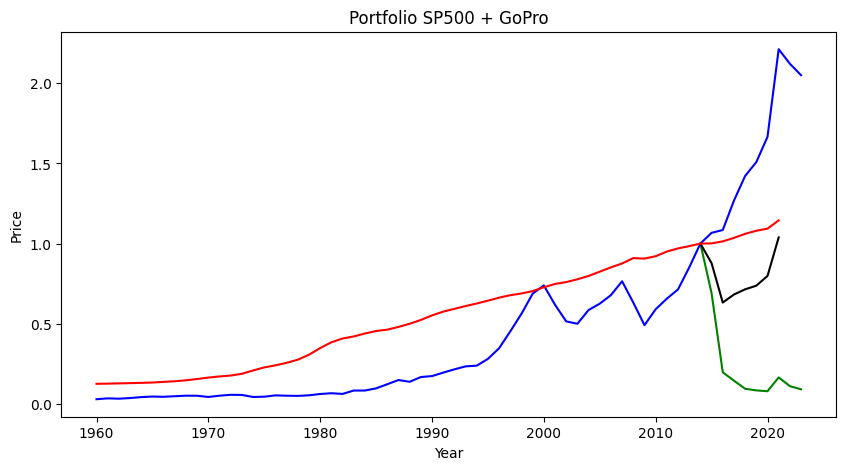

In [333]:
# Visualiza SP500 + AAPL en una proporcion de 0.5
plt.figure(figsize=(10, 5))

# Escala logartimica para y
# plt.yscale('log')
# Graficar la serie de tiempo completa
plt.plot(PF3['Year'],PF3['SP14'], label='SP500', color='blue')
plt.plot(PF3['Year'],PF3['IdxGPRO'], label='GoPro', color='green')
plt.plot(PF3['Year'],PF3['Portfolio'], label='Portfolio', color='black')
plt.plot(PF3['Year'],PF3['CPI14'], label='CPI', color='red')

# Etiquetas y título
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Portfolio SP500 + GoPro')
plt.legend()
# Mostrar la gráfica
plt.show()

In [334]:
PF3.to_csv('data/PF3.csv')

## Bonos del Tesoro US: GS10

In [292]:
GS10 = pd.read_csv('data/GS10.csv')
GS10 = GS10.rename(columns={'DATE':'Date'})
GS10['Date'] = pd.to_datetime(GS10.Date,format='%Y-%m-%d')
GS10['Year'] = GS10['Date'].dt.year
GS10.set_index('Date', inplace=True) # Establecer la columna DATE como índice
GS10.head(2)

,GS10,Year
Date,,
1953-04-01,2.83,1953
1953-05-01,3.05,1953


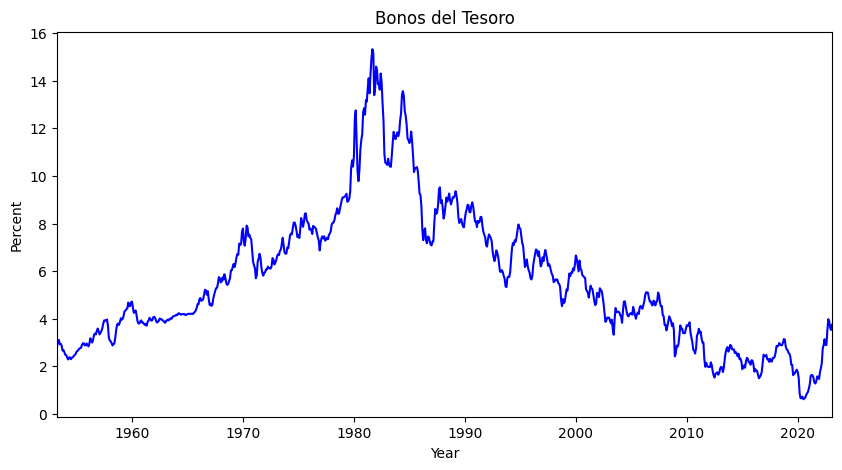

In [272]:
# Distingue rangos de fecha de bullmarket y bearmarket
plt.figure(figsize=(10, 5))
# Escala logartimica para y
# plt.yscale('log')
plt.plot(GS10['GS10'], label='Bonos del Tesoro', color='blue')
plt.xlim(GS10.index.min(), GS10.index.max())
# Etiquetas y título
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Bonos del Tesoro')
plt.show()

In [293]:
GS10.to_csv('pdata/GS10.csv')
GS10 = pd.read_csv('pdata/GS10.csv',index_col=0)
GS10.head(2)

,GS10,Year
Date,,
1953-04-01,2.83,1953
1953-05-01,3.05,1953


## GS10 / CPI

In [322]:
GS10_CPI = pd.read_csv('data/GS10_CPI.csv')
GS10_CPI.rename(columns={'GS10_CPIAUCSL_PC1':'GS10R'},inplace=True)
GS10_CPI = GS10_CPI.rename(columns={'DATE':'Date'})
GS10_CPI['Date'] = pd.to_datetime(GS10_CPI.Date,format='%Y-%m-%d')
GS10_CPI['Year'] = GS10_CPI['Date'].dt.year
GS10_CPI.set_index('Date', inplace=True) # Establecer la columna DATE como índice
GS10_CPI.head(2)

,GS10R,Year
Date,,
2013-04-01,0.62119,2013
2013-05-01,0.53961,2013


<Figure size 1000x500 with 0 Axes>

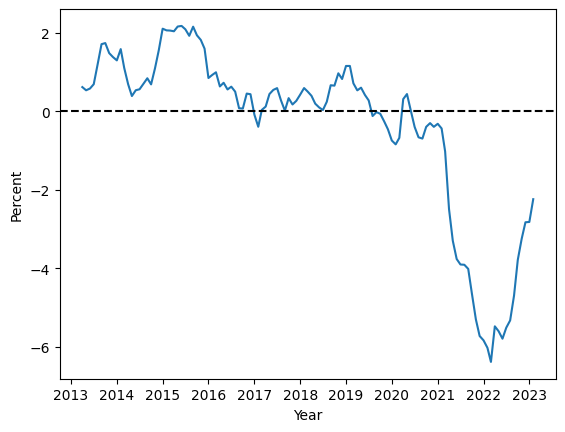

In [323]:
# Distingue rangos de fecha de bullmarket y bearmarket
plt.figure(figsize=(10, 5))
fig, ax = plt.subplots()
# Graficamos los datos
ax.plot(GS10_CPI.index, GS10_CPI['GS10R'])
# plt.yscale('log')
# ax.plot(GS10_CPI['GS10R'], label='Bonos del Tesoro', color='blue')
# plot.xlim(GS10_CPI.index.min(), GS10_CPI.index.max())
# Configuramos el formato de las fechas en el eje X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Configuramos los intervalos entre las marcas del eje X
ax.xaxis.set_major_locator(mdates.YearLocator())
# Etiquetas y título
# plt.xlabel('Year')
# plt.ylabel('Percent')
ax.set_xlabel('Year')
ax.set_ylabel('Percent')
# plt.title('Bonos del Tesoro Ajustados por Inflación')
# Agregamos la línea horizontal
ax.axhline(y=0, color='black', linestyle='--')
plt.show()

In [324]:
GS10_CPI.to_csv('pdata/GS10_CPI.csv')
GS10_CPI - pd.read_csv('pdata/GS10_CPI.csv', index_col=0)
GS10_CPI

,GS10R,Year
Date,,
2013-04-01,0.62119,2013
2013-05-01,0.53961,2013
2013-06-01,0.58421,2013
2013-07-01,0.69453,2013
2013-08-01,1.20119,2013
...,...,...
2022-10-01,-3.78249,2022
2022-11-01,-3.24535,2022
2022-12-01,-2.82494,2022


# GS10/CPI Acumulado

In [338]:
GS10_CPICS = pd.read_csv('data/GS10_CPI_Acum.csv',sep=';')
GS10_CPICS.rename(columns={'Anualizado':'CumSum'},inplace=True)
GS10_CPICS = GS10_CPICS.rename(columns={'DATE':'Date'})
GS10_CPICS['Date'] = pd.to_datetime(GS10_CPICS.Date,format='%Y-%m-%d')
GS10_CPICS['Year'] = GS10_CPICS['Date'].dt.year
GS10_CPICS.set_index('Date', inplace=True) # Establecer la columna DATE como índice
GS10_CPICS['CumSum'] = GS10_CPICS['CumSum'].str.replace(',', '.').astype(float)
GS10_CPICS['CumSum'] = GS10_CPICS['CumSum'].astype(float)

<Figure size 1000x500 with 0 Axes>

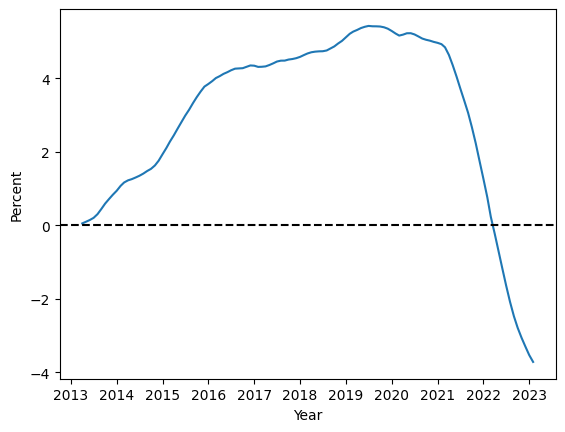

In [340]:
# Distingue rangos de fecha de bullmarket y bearmarket
plt.figure(figsize=(10, 5))
fig, ax = plt.subplots()
ax.plot(GS10_CPICS.index, GS10_CPICS['CumSum'])
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_xlabel('Year')
ax.set_ylabel('Percent')
ax.axhline(y=0, color='black', linestyle='--')
plt.show()

## DFII10 Bonos del Tesoro Indexados Por Inflacion

In [349]:
DFII10 = pd.read_csv('data/DFII10.csv')
DFII10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5276 entries, 0 to 5275
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    5276 non-null   object
 1   DFII10  5276 non-null   object
dtypes: object(2)
memory usage: 82.6+ KB


In [352]:
DFII10 = pd.read_csv('data/DFII10.csv')
DFII10 = DFII10.rename(columns={'DATE':'Date'})
DFII10['Date'] = pd.to_datetime(DFII10.Date,format='%Y-%m-%d')
DFII10['Year'] = DFII10['Date'].dt.year
DFII10.set_index('Date', inplace=True) # Establecer la columna DATE como índice
DFII10.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5276 entries, 2003-01-02 to 2023-03-23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DFII10  5276 non-null   object
 1   Year    5276 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.7+ KB


In [366]:
# Convertir los valores de la columna a numéricos
DFII10['DFII10'] = pd.to_numeric(DFII10['DFII10'], errors='coerce')
# Seleccionar las filas que no contienen el valor '.'
DFII10['DFII10'] = DFII10['DFII10'].loc[DFII10['DFII10'] != '.']

<Figure size 1000x500 with 0 Axes>

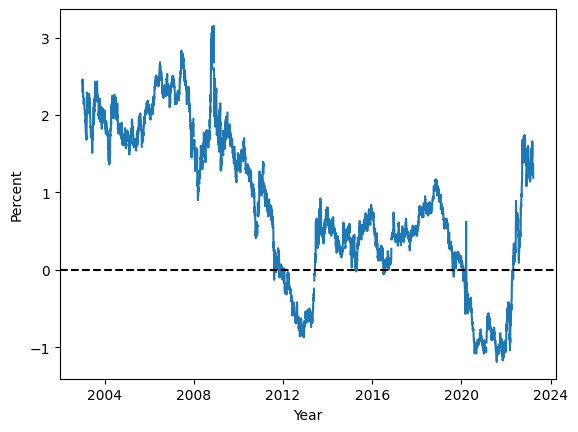

In [370]:
# Distingue rangos de fecha de bullmarket y bearmarket
plt.figure(figsize=(10, 5))
fig, ax = plt.subplots()
ax.plot(DFII10.index, DFII10['DFII10'])
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_xlabel('Year')
ax.set_ylabel('Percent')
ax.axhline(y=0, color='black', linestyle='--')
plt.show()